### lr_schedulerのtutorial

In [262]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Linear(1, 1)
)

In [263]:
def lr_plot(optimizer, scheduler, title=None, library="torch"):
    lr_list = []
    for i in range(100):
        optimizer.step()
        lr_list.append(optimizer.param_groups[0]["lr"])
        if library == "timm":
            scheduler.step(i+1)
        else:
            scheduler.step()

    fig, ax = plt.subplots(1, 1, facecolor="white", figsize=(6, 3))
    ax.plot(range(100), lr_list)
    ax.set_title(title, fontsize=18)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_ylim([-0.01, 1.1])
    plt.show()

    return lr_list

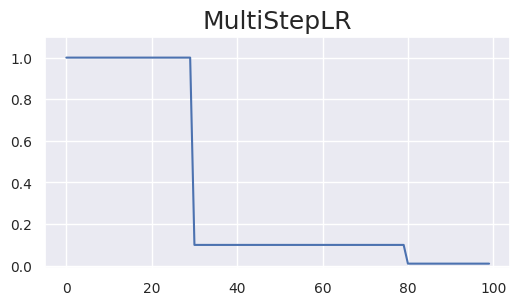

In [264]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)
t1 = lr_plot(optimizer, scheduler, title="MultiStepLR")

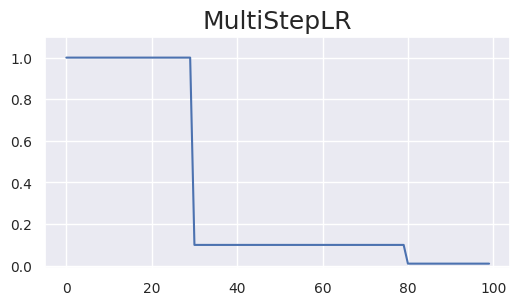

In [265]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)
t2 = lr_plot(optimizer, scheduler, title="MultiStepLR", library="timm")

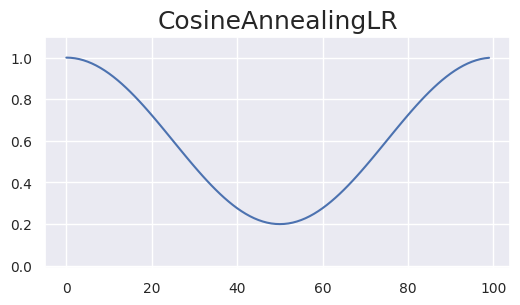

In [266]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0.2)
lr = lr_plot(optimizer, scheduler, title="CosineAnnealingLR")

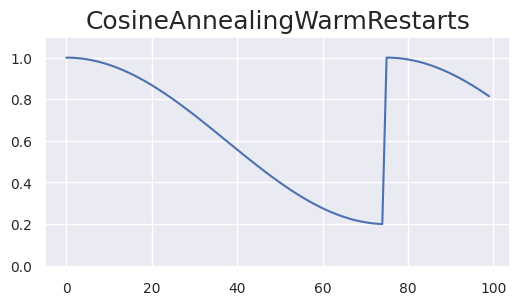

In [267]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=75, eta_min=0.2)
lr = lr_plot(optimizer, scheduler, title="CosineAnnealingWarmRestarts")

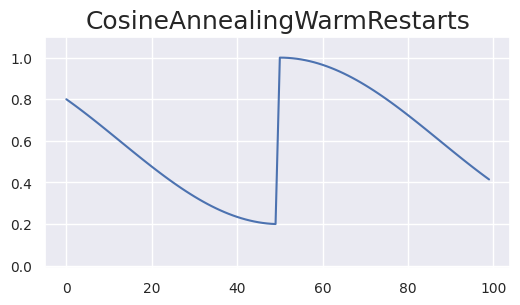

In [268]:
lr = lr_plot(optimizer, scheduler, title="CosineAnnealingWarmRestarts")

### timmのschedulerはstepにepoch(イテレーション)を指定しないといけない --

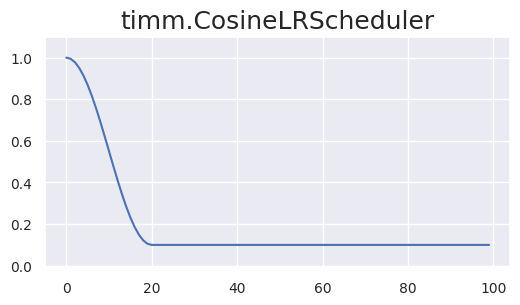

In [280]:
from timm.scheduler import CosineLRScheduler
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = CosineLRScheduler(
    optimizer, t_initial=20, lr_min=0.1, warmup_t=0, warmup_lr_init=0.1, warmup_prefix=True, cycle_limit=1
)
lr = lr_plot(optimizer, scheduler, title="timm.CosineLRScheduler", library="timm")

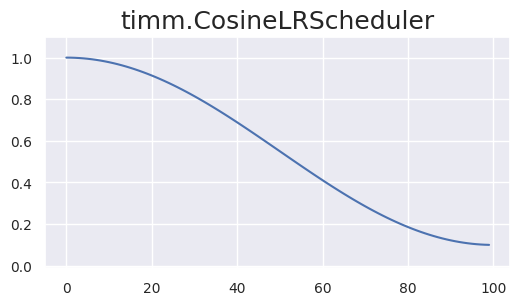

In [277]:
from timm.scheduler import CosineLRScheduler
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler = CosineLRScheduler(
    optimizer, t_initial=100, lr_min=0.1, warmup_t=0, warmup_lr_init=0.1, warmup_prefix=False, cycle_limit=1
)
lr = lr_plot(optimizer, scheduler, title="timm.CosineLRScheduler", library="timm")

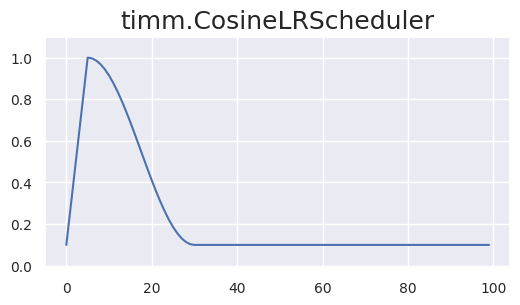

In [270]:
lr = lr_plot(optimizer, scheduler, title="timm.CosineLRScheduler", library="timm")

### torchのschedulerはstep(), timmのschedulerはstep(iter+1)が必要
* scheduler.stepの前にtorchかtimmかを判定したい

In [271]:
s1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=0.1)
s2 = CosineLRScheduler(
    optimizer, t_initial=200, lr_min=0.1, warmup_t=20, warmup_lr_init=0.1, warmup_prefix=True
)

In [272]:
# これは一応行けるけど、新しいscheduler入れるたびにコードに書き足さなアカン --
s1.__class__ == torch.optim.lr_scheduler.StepLR

True

In [273]:
"timm" in str(s1.__class__)

False